In [24]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median

# Plot Anaylisis

## One Time Preprocessing

General (non serve)

In [25]:
results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'


pbc_results = glob.glob(os.path.join(results_path, "*pbc*.csv"))
pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*.csv"))
poker_results = glob.glob(os.path.join(results_path, "*poker*.csv"))

lst = []
for file in pbc_results:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_results:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_results:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./results_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./results_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./results_datasets/poker_results.csv', index=False)

For each seed

In [26]:
file = open("new_random_seeds.txt", "r")
new_random_seeds = file.read()
file.close()

new_random_seeds = new_random_seeds.replace("\n", "").replace(" ", "").split(",")

results_path = './plotData/results/'
progress_logs_path = './plotData/progress_logs/'

for seed in new_random_seeds:
    pbc_results = glob.glob(os.path.join(results_path, "*pbc*"+seed+"*.csv"))
    pharynx_results = glob.glob(os.path.join(results_path, "*pharynx*"+seed+"*.csv"))
    poker_results = glob.glob(os.path.join(results_path, "*poker*"+seed+"*.csv"))

    lst = []
    for file in pbc_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in pharynx_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    lst = []
    for file in poker_results:
        df = pd.read_csv(file)
        df.insert(0, 'seed', int(seed))
        lst.append(df)
    poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

    pbc_dataframe.to_csv('./seed_separated_datasets/pbc_results_seed_'+seed+'.csv', index=False)
    pharynx_dataframe.to_csv('./seed_separated_datasets/pharynx_results_seed_'+seed+'.csv', index=False)
    poker_dataframe.to_csv('./seed_separated_datasets/poker_results_seed_'+seed+'.csv', index=False)

In [27]:
datasets_path = './seed_separated_datasets/'

pbc_datasets = glob.glob(os.path.join(datasets_path, "*pbc*.csv"))
pharynx_datasets = glob.glob(os.path.join(datasets_path, "*pharynx*.csv"))
poker_datasets = glob.glob(os.path.join(datasets_path, "*poker*.csv"))

lst = []
for file in pbc_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pbc_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in pharynx_datasets:
    df = pd.read_csv(file)
    lst.append(df)
pharynx_dataframe = pd.concat(lst, axis=0, ignore_index=True)

lst = []
for file in poker_datasets:
    df = pd.read_csv(file)
    lst.append(df)
poker_dataframe = pd.concat(lst, axis=0, ignore_index=True)

pbc_dataframe.to_csv('./preprocessed_datasets/pbc_results.csv', index=False)
pharynx_dataframe.to_csv('./preprocessed_datasets/pharynx_results.csv', index=False)
poker_dataframe.to_csv('./preprocessed_datasets/poker_results.csv', index=False)

## Actual Analysis

In [28]:
pbc_dataframe = pd.read_csv('./preprocessed_datasets/pbc_results.csv')
pharynx_dataframe = pd.read_csv('./preprocessed_datasets/pharynx_results.csv')
poker_dataframe = pd.read_csv('./preprocessed_datasets/poker_results.csv')

In [29]:
pbc_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)
pharynx_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)
poker_dataframe.drop(columns=['n_nodes', 'evaluations'], inplace=True)

In [33]:
pbc_dataframe = pbc_dataframe.sort_values(by=['training_set_dimension','popsize','generations'], ascending=True)

In [34]:
pbc_dataframe

,seed,training_set_dimension,popsize,generations,test_rmse,train_rmse,time_taken
3480,47391,10,10,10,1236.266,541.207,0.001465
1848,55414,10,10,10,1428.750,528.709,0.001589
5846,75528,10,10,10,42394.769,599.063,0.034165
9110,192969,10,10,10,1260.819,541.167,0.001028
11558,226290,10,10,10,1207.742,411.869,0.001316
...,...,...,...,...,...,...,...
589,406090,500000,5000,10,942.092,942.700,8102.936206
590,406090,500000,5000,20,923.671,924.128,19851.860510
591,406090,500000,5000,50,917.765,917.947,95270.664009
575,406090,500000,10000,10,929.306,929.904,13867.798703


This piece of code retrieves all n-tuple of training_set_dimension, popsize, generations and makes the median from all the seeds with the same n-tuple
Then it creates a new dataframe without seeds where the test_rmse is the median calculated before

In [35]:
lst = []
already_iterated = []

for training_set_dimension, popsize, generations in zip(pbc_dataframe.training_set_dimension, pbc_dataframe.popsize, pbc_dataframe.generations):
    if [training_set_dimension, popsize, generations] in already_iterated:
        continue
    already_iterated.append([training_set_dimension,popsize,generations])
    rows = pbc_dataframe.loc[(pbc_dataframe['training_set_dimension'] == training_set_dimension) & (pbc_dataframe['popsize'] == popsize) & (pbc_dataframe['generations'] == generations)]
    lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

median_pbc_dataframe = pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

In [36]:
median_pbc_dataframe

,training_set_dimension,popsize,generations,median_test_rmse
0,10,10,10,1392.039
1,10,10,20,3152.433
2,10,10,50,2024.820
3,10,10,100,23030.478
4,10,10,200,2787.243
...,...,...,...,...
879,500000,5000,10,942.092
880,500000,5000,20,923.671
881,500000,5000,50,917.765
882,500000,10000,10,929.306


In [37]:
def median_dataframe(df):
    lst = []
    already_iterated = []

    for training_set_dimension, popsize, generations in zip(df.training_set_dimension, df.popsize, df.generations):
        if [training_set_dimension, popsize, generations] in already_iterated:
            continue
        already_iterated.append([training_set_dimension,popsize,generations])
        rows = df.loc[(df['training_set_dimension'] == training_set_dimension) & (df['popsize'] == popsize) & (df['generations'] == generations)]
        lst.append([training_set_dimension, popsize, generations, median(rows['test_rmse'].values)])

    return pd.DataFrame(lst, columns=['training_set_dimension', 'popsize', 'generations', 'median_test_rmse'])

[]

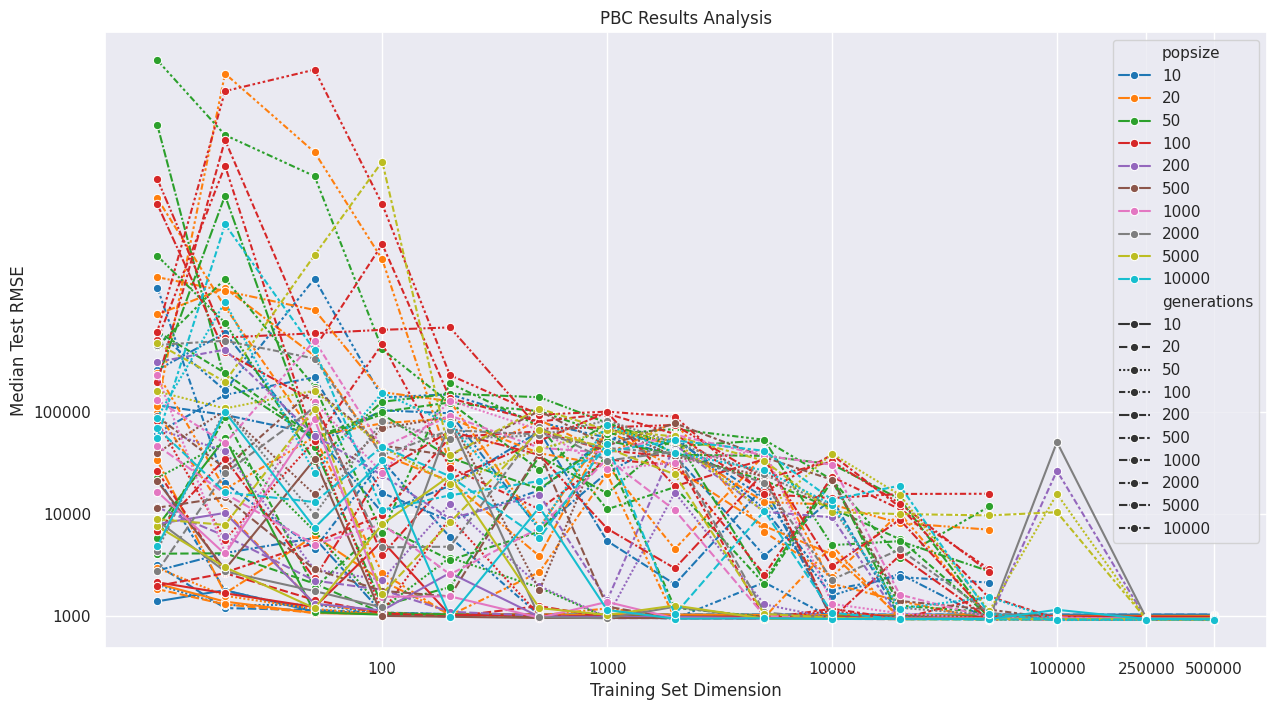

In [38]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

[]

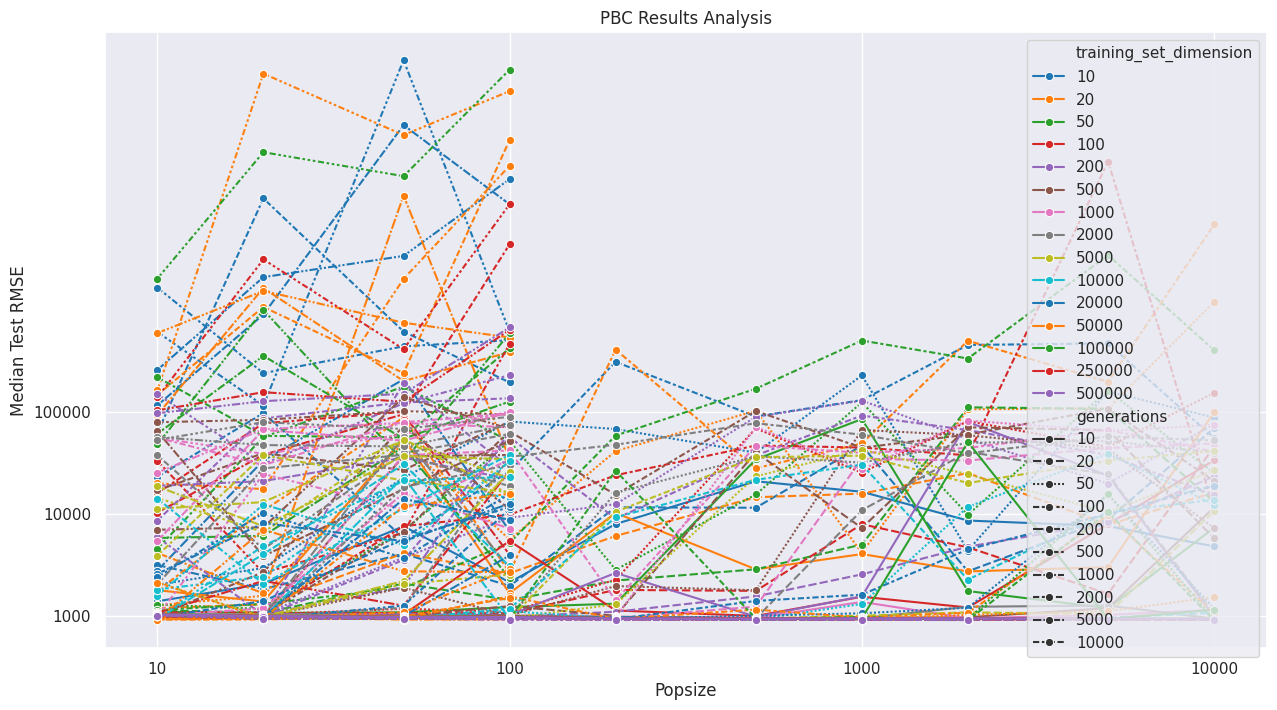

In [39]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='training_set_dimension', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Popsize')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

[]

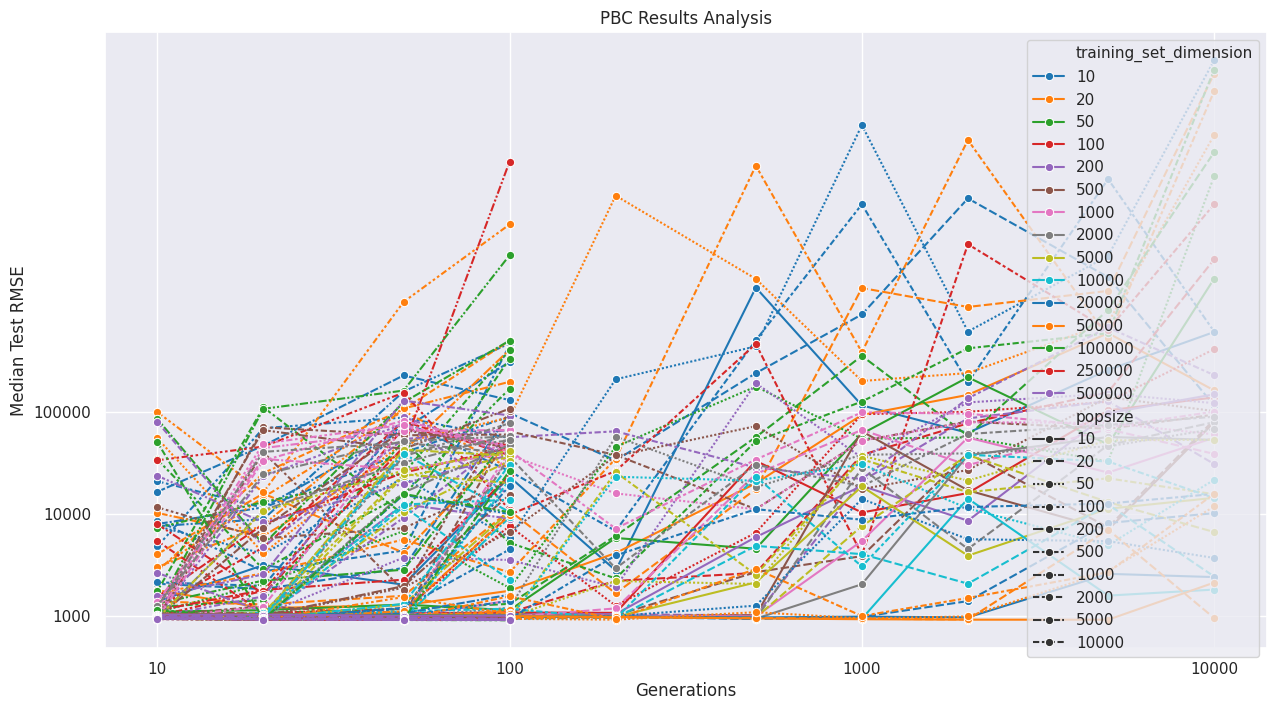

In [40]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='training_set_dimension', style='popsize', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('PBC Results Analysis')
pbc_plot.set_xlabel('Generations')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 10, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000, 100000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000, 100000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()

Ci sono meno punti perchè seaborn dovrebbe fare la media dei punti

Text(0.5, 1.0, 'Generations')

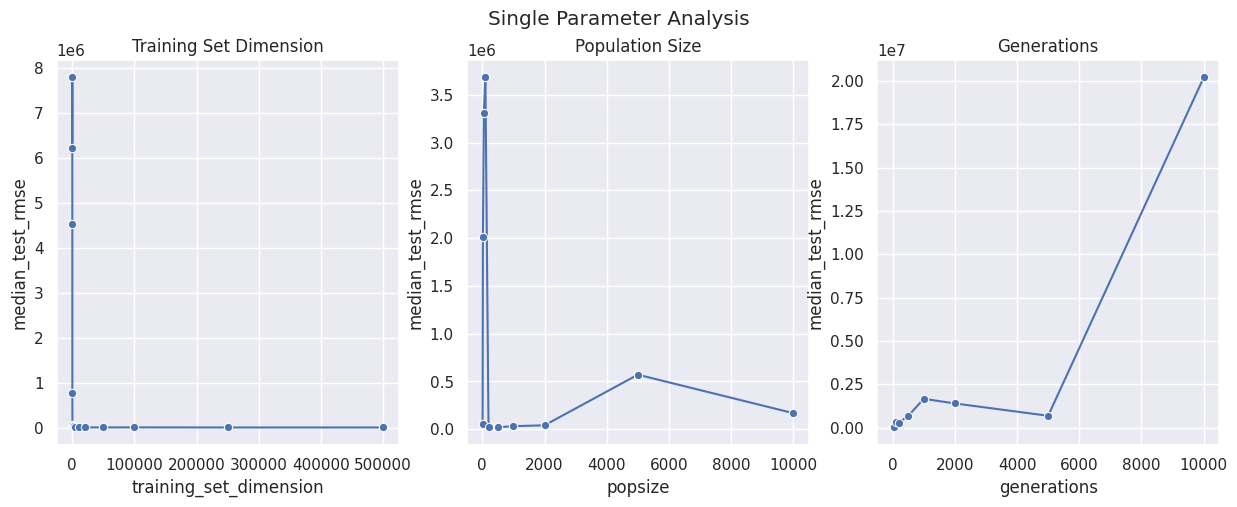

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Single Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', marker='o', errorbar=None)
axes[0].set_title('Training Set Dimension')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', marker='o', errorbar=None)
axes[1].set_title('Population Size')

sns.lineplot(ax=axes[2], data=median_pbc_dataframe, x='generations', y='median_test_rmse', marker='o', errorbar=None)
axes[2].set_title('Generations')

Text(0.5, 1.0, 'Training Set Dimension x Generations')

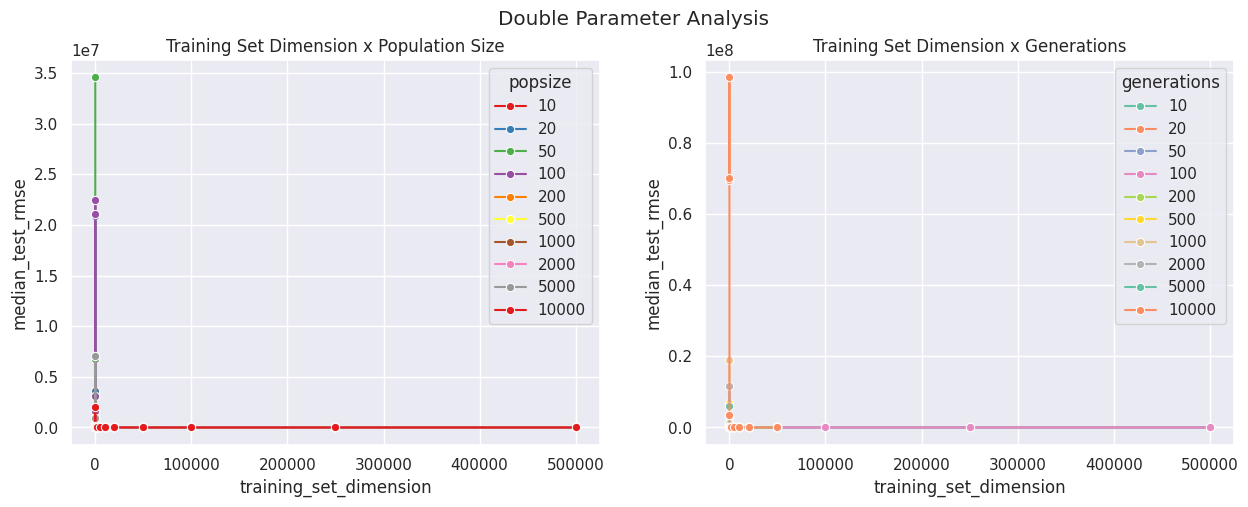

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Training Set Dimension x Population Size')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='training_set_dimension', y='median_test_rmse', hue='generations', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Training Set Dimension x Generations')

Text(0.5, 1.0, 'Population Size x Training Set Dimension')

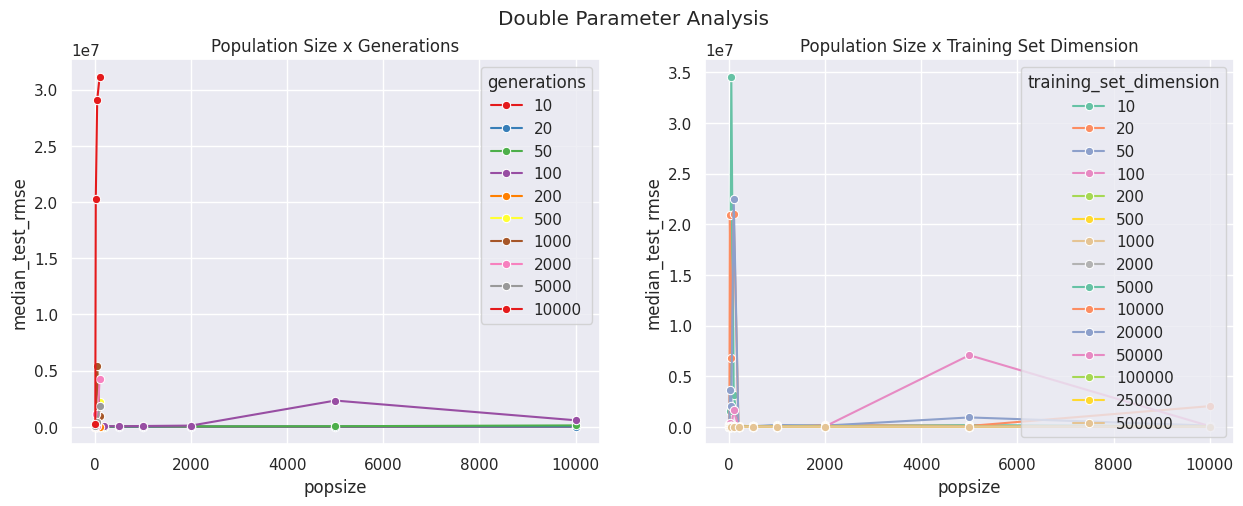

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='generations', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Population Size x Generations')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='popsize', y='median_test_rmse', hue='training_set_dimension', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Population Size x Training Set Dimension')

Text(0.5, 1.0, 'Generations x Population Size')

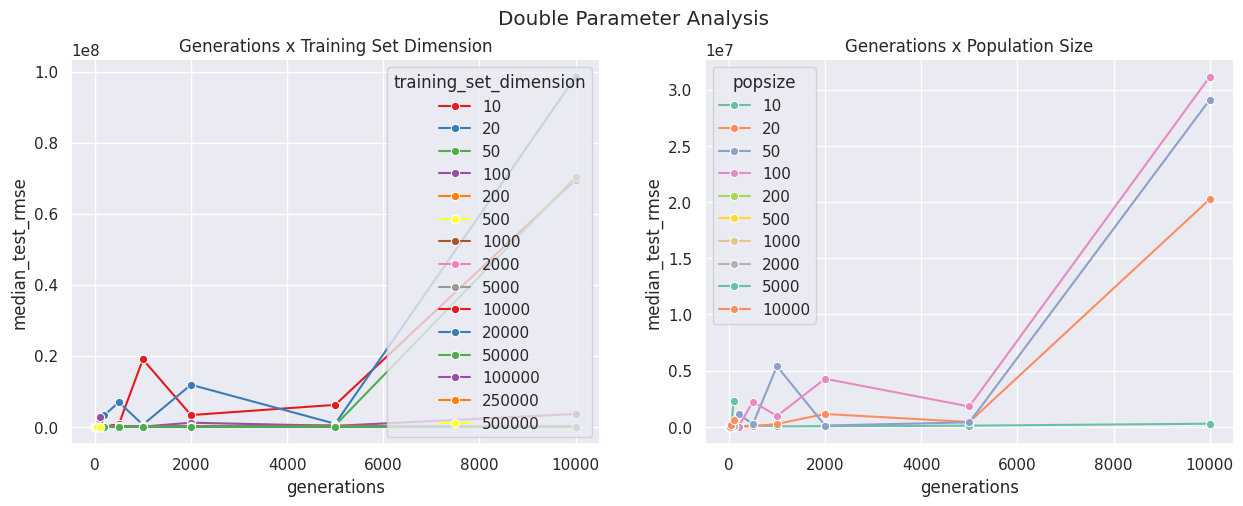

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Double Parameter Analysis')

sns.lineplot(ax=axes[0], data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='training_set_dimension', marker='o', errorbar=None, palette='Set1')
axes[0].set_title('Generations x Training Set Dimension')

sns.lineplot(ax=axes[1], data=median_pbc_dataframe, x='generations', y='median_test_rmse', hue='popsize', marker='o', errorbar=None, palette='Set2')
axes[1].set_title('Generations x Population Size')

<Figure size 1500x800 with 0 Axes>

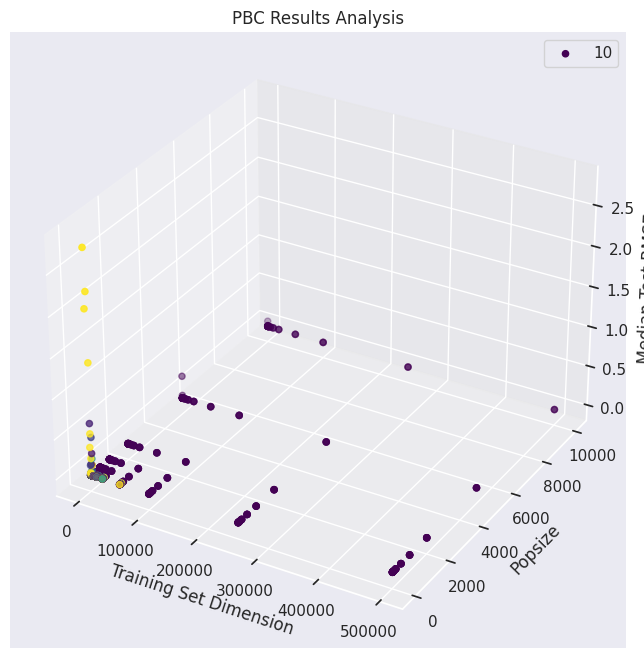

In [45]:
plt.figure(figsize=(15,8))
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(xs=median_pbc_dataframe['training_set_dimension'], ys=median_pbc_dataframe['popsize'], zs=median_pbc_dataframe['median_test_rmse'], c=median_pbc_dataframe['generations'], cmap='viridis')

ax.set_xlabel('Training Set Dimension')
ax.set_ylabel('Popsize')
ax.set_zlabel('Median Test RMSE')
ax.set_title('PBC Results Analysis')
ax.legend(pd.unique(median_pbc_dataframe['generations']))

plt.show()

In [57]:
median_pharynx_dataframe = median_dataframe(pharynx_dataframe)

[]

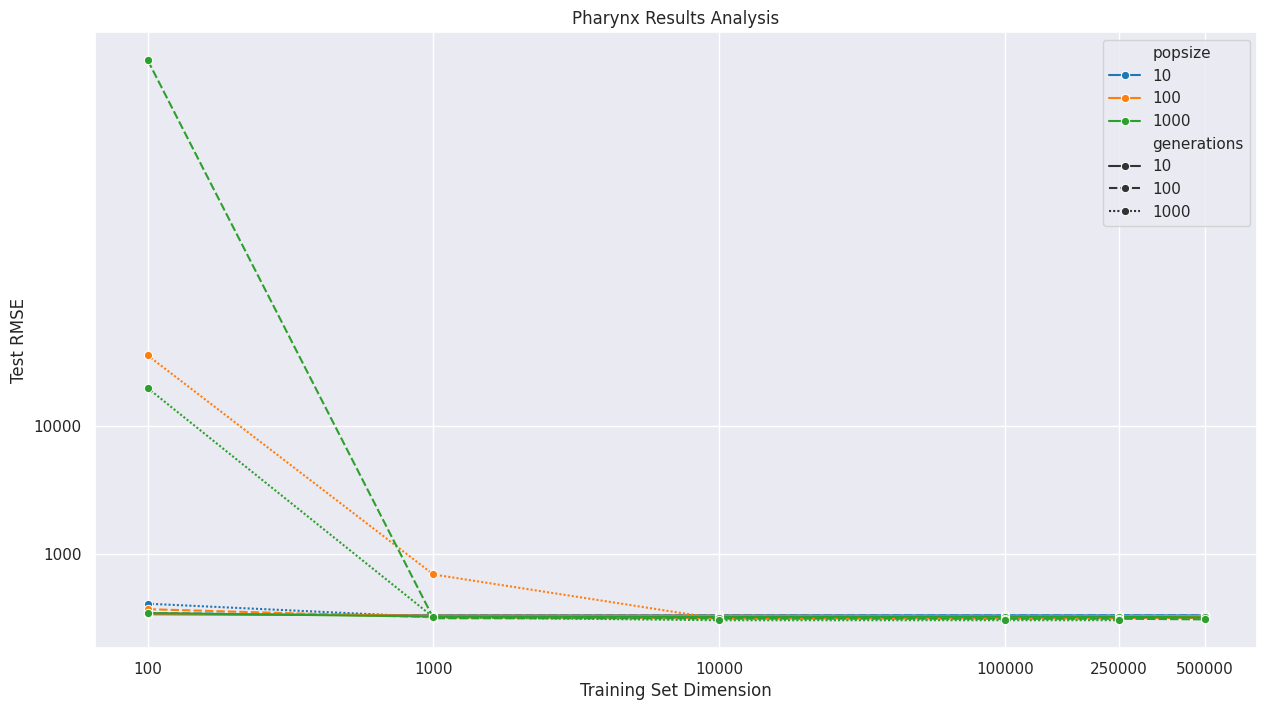

In [60]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_pharynx_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('Pharynx Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()


In [59]:
median_poker_dataframe = median_dataframe(poker_dataframe)

[]

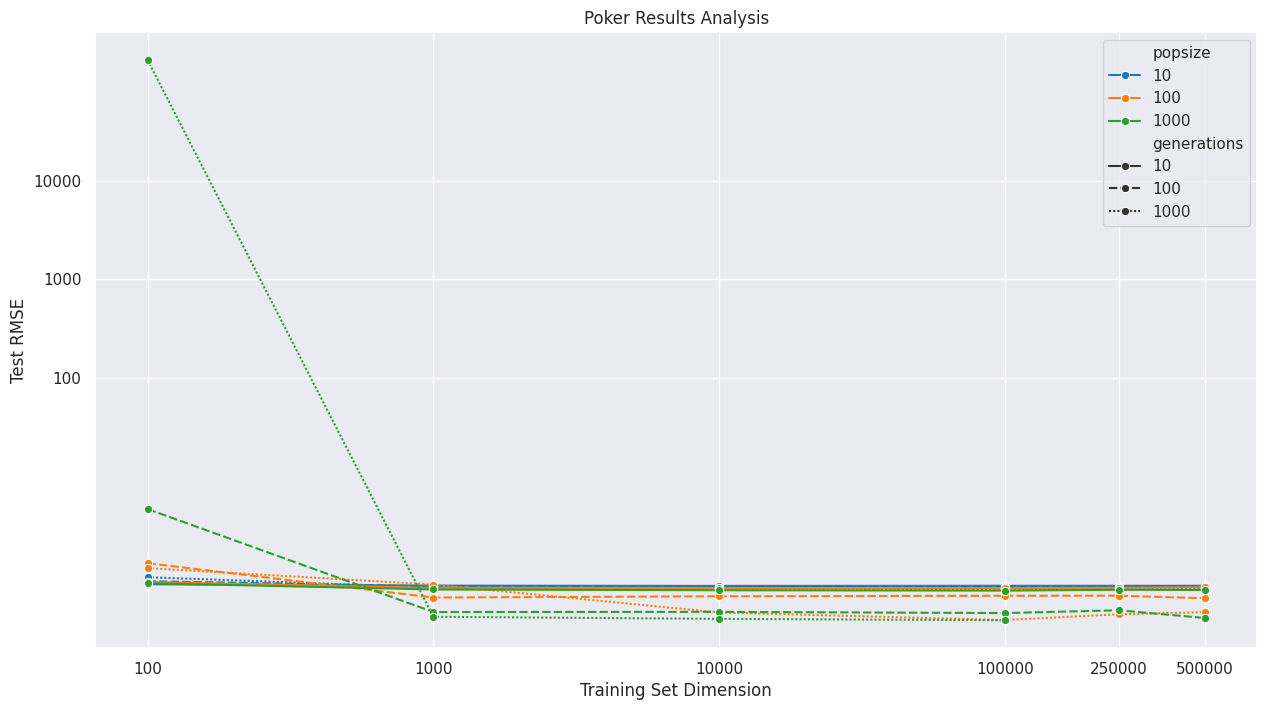

In [61]:
sns.set_theme(rc={'figure.figsize':(15,8)})
#sns.set_theme(style="darkgrid")

pbc_plot = sns.lineplot(data=median_poker_dataframe, x='training_set_dimension', y='median_test_rmse', hue='popsize', style='generations', marker='o', errorbar=None, palette='tab10')
pbc_plot.set_xscale('log')
pbc_plot.set_yscale('log')
pbc_plot.set_title('Poker Results Analysis')
pbc_plot.set_xlabel('Training Set Dimension')
pbc_plot.set_ylabel('Median Test RMSE')
pbc_plot.set_xticks([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_xticklabels([0, 100, 1000, 10000, 100000, 250000, 500000])
pbc_plot.set_yticks([0, 100, 1000, 10000])
pbc_plot.set_yticklabels([0, 100, 1000, 10000])
#pbc_plot.set_xlim(100)
#pbc_plot.set_ylim(0, 100000)

pbc_plot.plot()
